# Import Libraries and Read CSV

In [1]:
# General
import numpy as np
import pandas as pd
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read ph_loans_cleaned.csv
df_ph_loans_cleaned = pd.read_csv('Dataset/ph_loans_cleaned.csv', 
                                   parse_dates=['posted_time'], 
                                   dtype={'loan_id':'object', 'partner_id':'object'})

# Read sea_loans_cleaned.csv
df_sea_loans_cleaned = pd.read_csv('Dataset/sea_loans_cleaned.csv', 
                                   parse_dates=['posted_time'], 
                                   dtype={'loan_id':'object', 'partner_id':'object'})

# Read all_loans_cleaned.csv
df_all_loans_cleaned = pd.read_csv('Dataset/all_loans_cleaned.csv', 
                                   parse_dates=['posted_time'], 
                                   dtype={'loan_id':'object', 'partner_id':'object'})

# EDA on PH

In [21]:
# 1. Copy df_ph_loans_cleaned to df_ph and get info
df_ph = df_ph_loans_cleaned.copy(deep=True)
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378580 entries, 0 to 378579
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   loan_id                          378580 non-null  object             
 1   group_loan                       378580 non-null  int64              
 2   with_image                       378580 non-null  int64              
 3   with_video                       378580 non-null  int64              
 4   posted_time                      378580 non-null  datetime64[ns, UTC]
 5   is_expired                       378580 non-null  int64              
 6   loan_amount                      378580 non-null  float64            
 7   loan_amount_bin                  378580 non-null  object             
 8   personal_use                     378580 non-null  int64              
 9   sector_name                      378580 non-null  object   

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


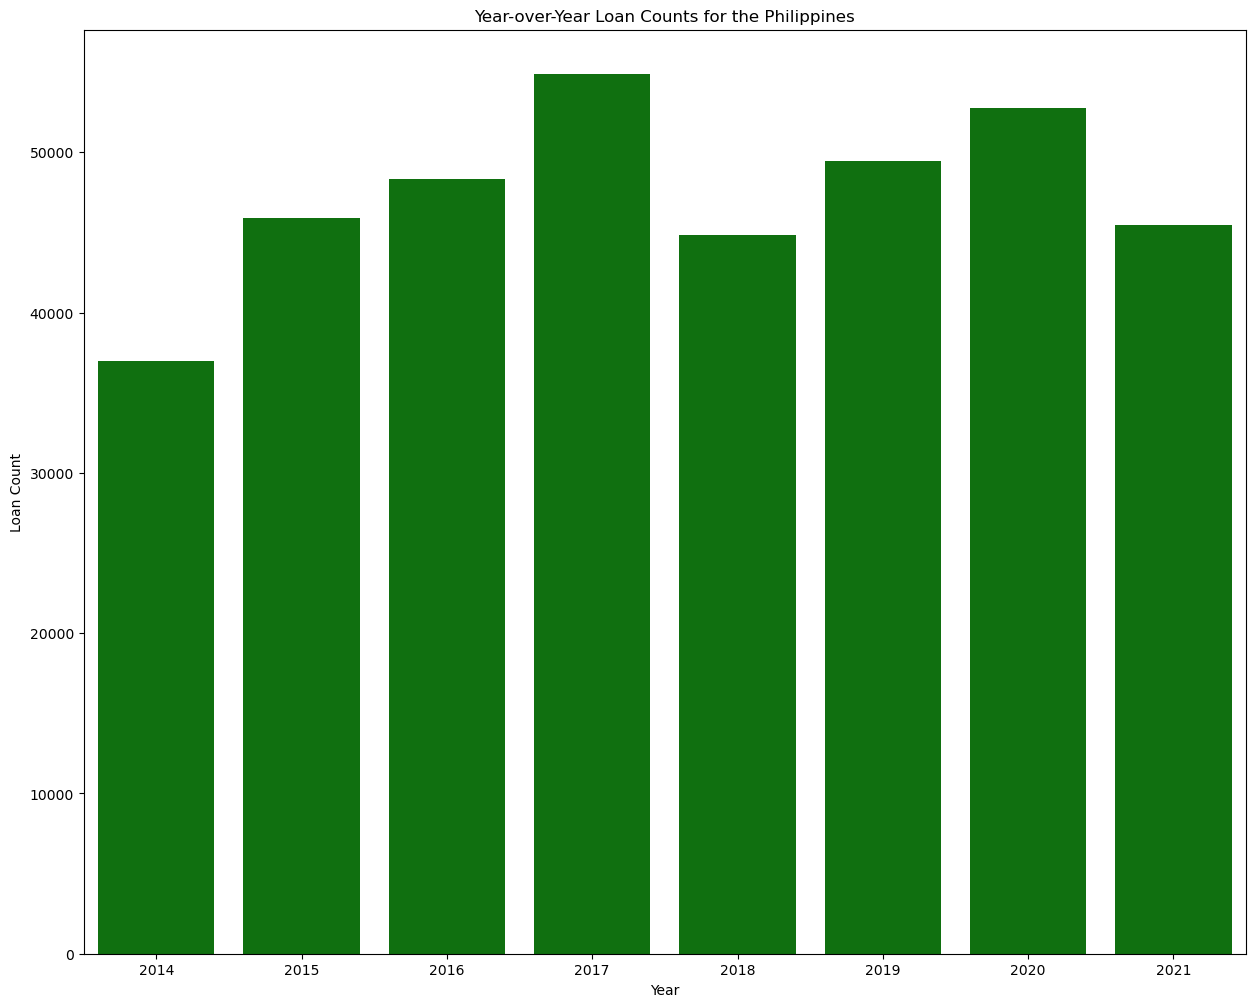

In [22]:
# 2. Year-over-Year Philippines Number of Loans
df_ph['posted_year'] = df_ph['posted_time'].dt.year
df_ph = df_ph[['posted_time', 'posted_year'] + [col for col in df_ph.columns if col not in ['posted_time', 'posted_year']]]
yoy_ph = df_ph['posted_year'].value_counts()

plt.figure(figsize=(15, 12))
sns.barplot(x=yoy_ph.index, y=yoy_ph.values, color='green')  
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.title('Year-over-Year Loan Counts for the Philippines')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


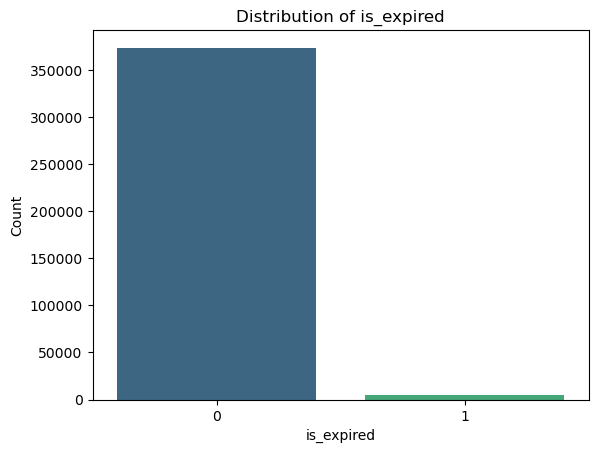

In [23]:
# 3. Check distribution on the target (is_expired)
count_is_expired = df_ph['is_expired'].value_counts()
sns.barplot(x=count_is_expired.index, y=count_is_expired.values, palette='viridis')
plt.xlabel('is_expired')
plt.ylabel('Count')
plt.title('Distribution of is_expired')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


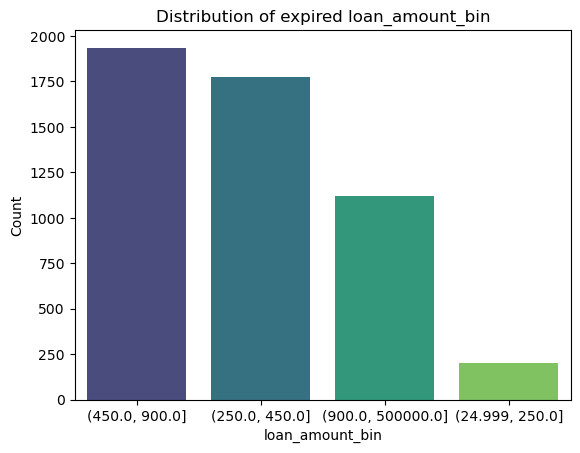

In [24]:
# 4.1 Expired distribution of loan_amount_bin
df_ph_1 = df_ph[df_ph['is_expired']==1]
count_loan_amount_bin = df_ph_1['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of expired loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


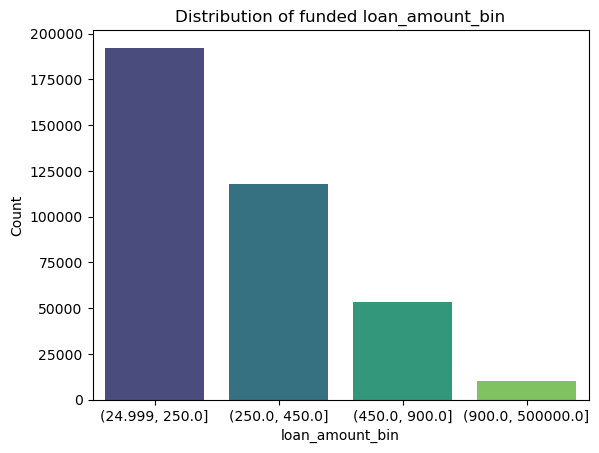

In [25]:
# 4.2 Funded distribution of loan_amount_bin
df_ph_0 = df_ph[df_ph['is_expired']==0]
count_loan_amount_bin = df_ph_0['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of funded loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


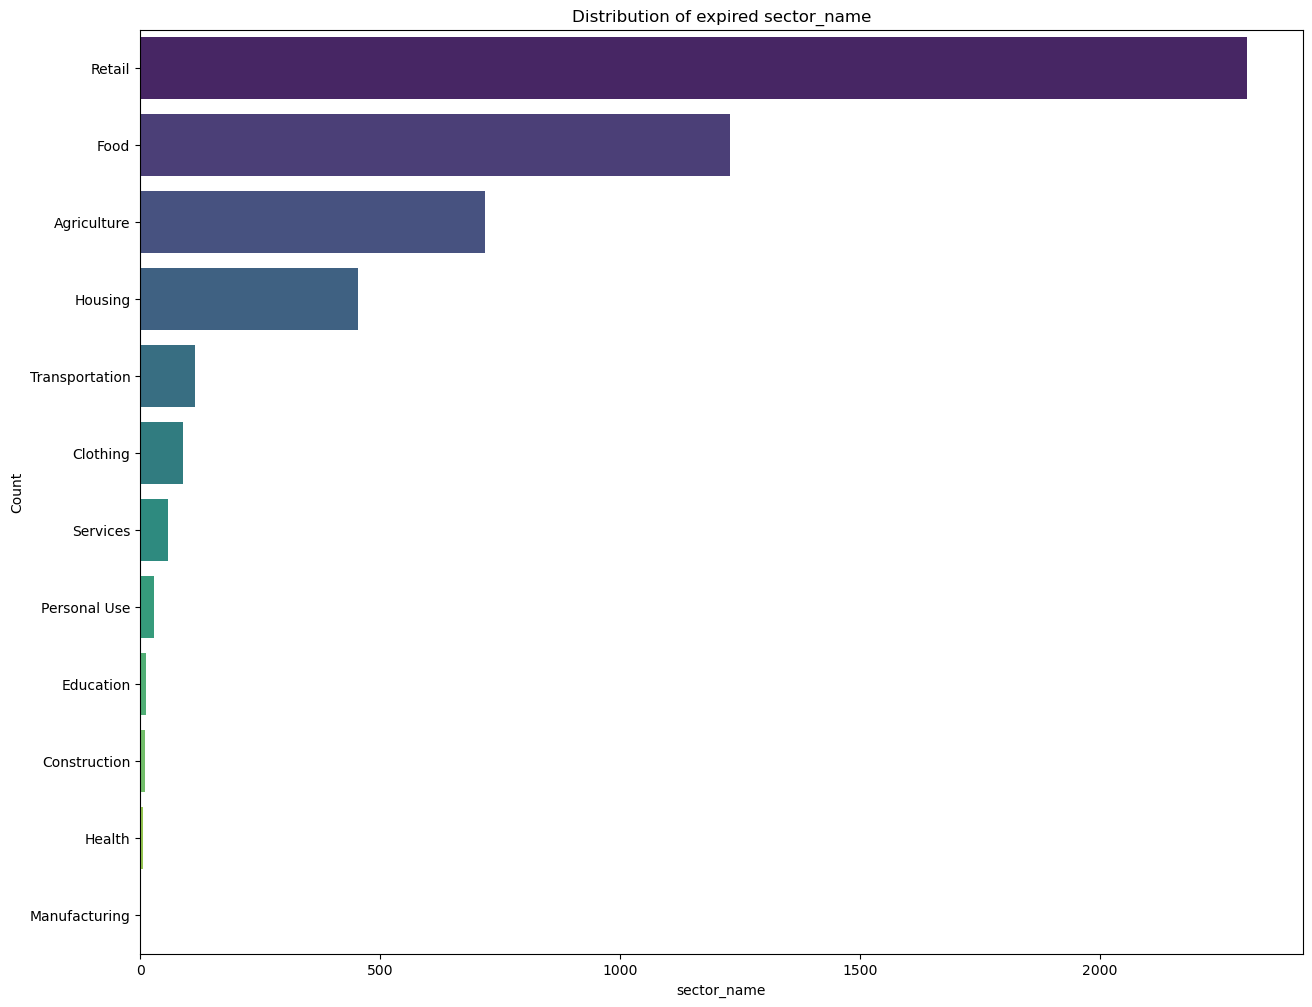

In [40]:
# 5.1 Expired distribution of sector_name
df_ph_1 = df_ph[df_ph['is_expired']==1]
count_sector_name = df_ph_1['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of expired sector_name')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


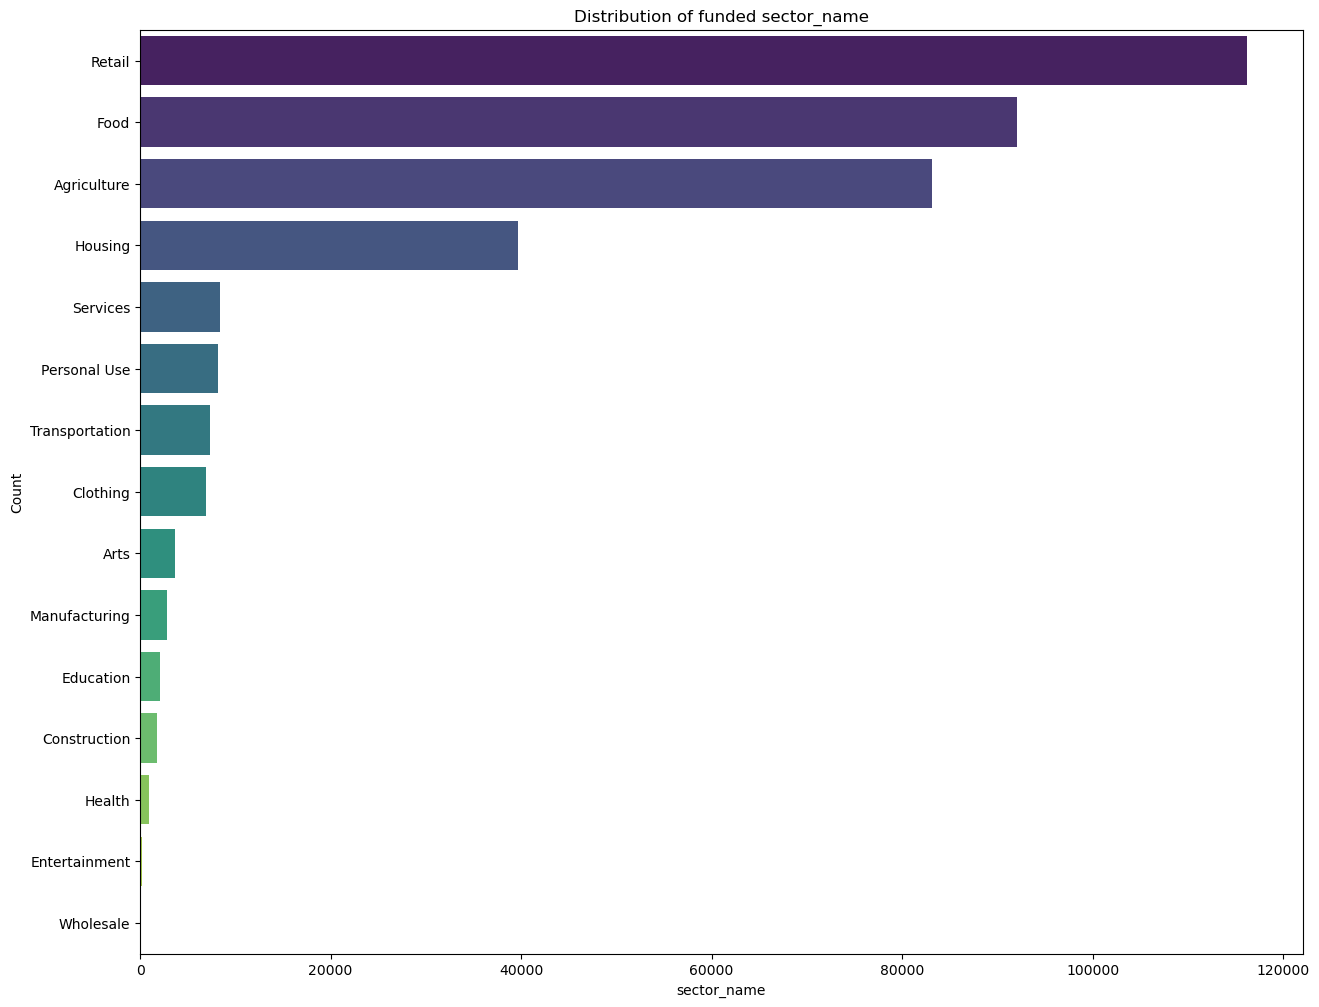

In [41]:
# 5.2 Funded distribution of sector_name
df_ph_0 = df_ph[df_ph['is_expired']==0]
count_sector_name = df_ph_0['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of funded sector_name')
plt.show()

# EDA on SEA Countries

In [10]:
# 1. Copy df_sea_loans_cleaned to df_sea and get info
df_sea = df_sea_loans_cleaned.copy(deep=True)
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500977 entries, 0 to 500976
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   loan_id                          500977 non-null  object             
 1   group_loan                       500977 non-null  int64              
 2   with_image                       500977 non-null  int64              
 3   with_video                       500977 non-null  int64              
 4   posted_time                      500977 non-null  datetime64[ns, UTC]
 5   is_expired                       500977 non-null  int64              
 6   loan_amount                      500977 non-null  float64            
 7   loan_amount_bin                  500977 non-null  object             
 8   personal_use                     500977 non-null  int64              
 9   sector_name                      500977 non-null  object   

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


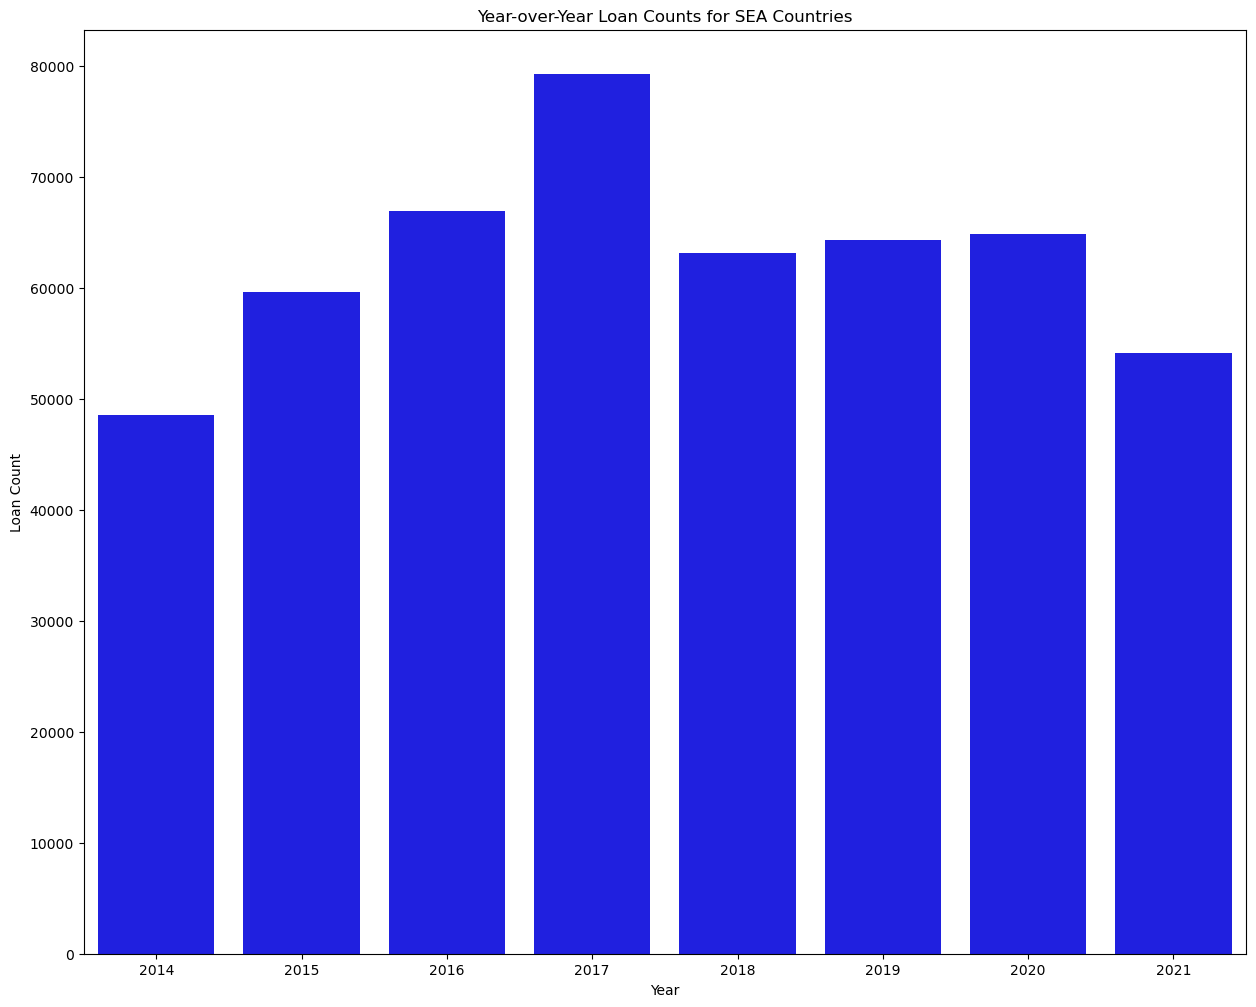

In [11]:
# 2. Year-over-Year SEA Countries Number of Loans
df_sea['posted_year'] = df_sea['posted_time'].dt.year
df_sea = df_sea[['posted_time', 'posted_year'] + [col for col in df_sea.columns if col not in ['posted_time', 'posted_year']]]
yoy_sea = df_sea['posted_year'].value_counts()

plt.figure(figsize=(15, 12))
sns.barplot(x=yoy_sea.index, y=yoy_sea.values, color='blue')  
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.title('Year-over-Year Loan Counts for SEA Countries')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


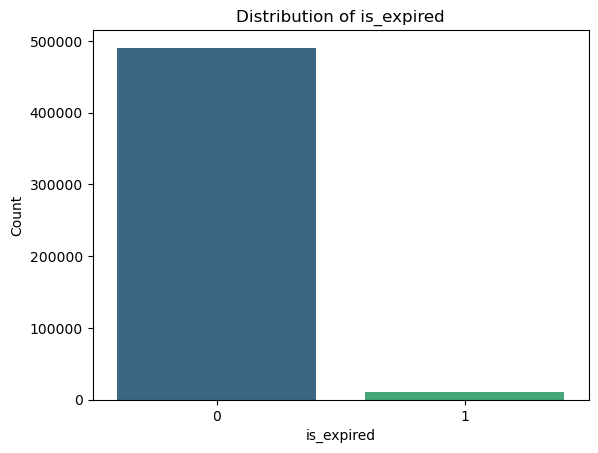

In [13]:
# 3. Check distribution on the target (is_expired)
count_is_expired = df_sea['is_expired'].value_counts()
sns.barplot(x=count_is_expired.index, y=count_is_expired.values, palette='viridis')
plt.xlabel('is_expired')
plt.ylabel('Count')
plt.title('Distribution of is_expired')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


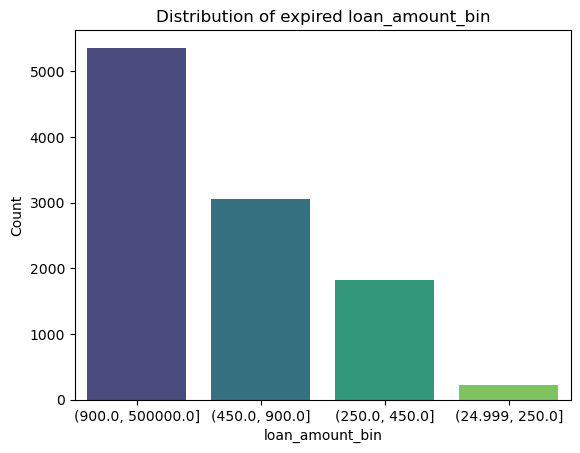

In [26]:
# 4.1 Expired distribution of loan_amount_bin
df_sea_1 = df_sea[df_sea['is_expired']==1]
count_loan_amount_bin = df_sea_1['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of expired loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


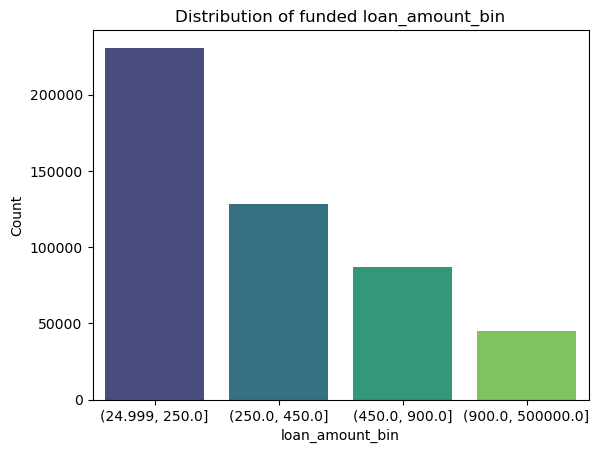

In [27]:
# 4.2 Funded distribution of loan_amount_bin
df_sea_0 = df_sea[df_sea['is_expired']==0]
count_loan_amount_bin = df_sea_0['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of funded loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


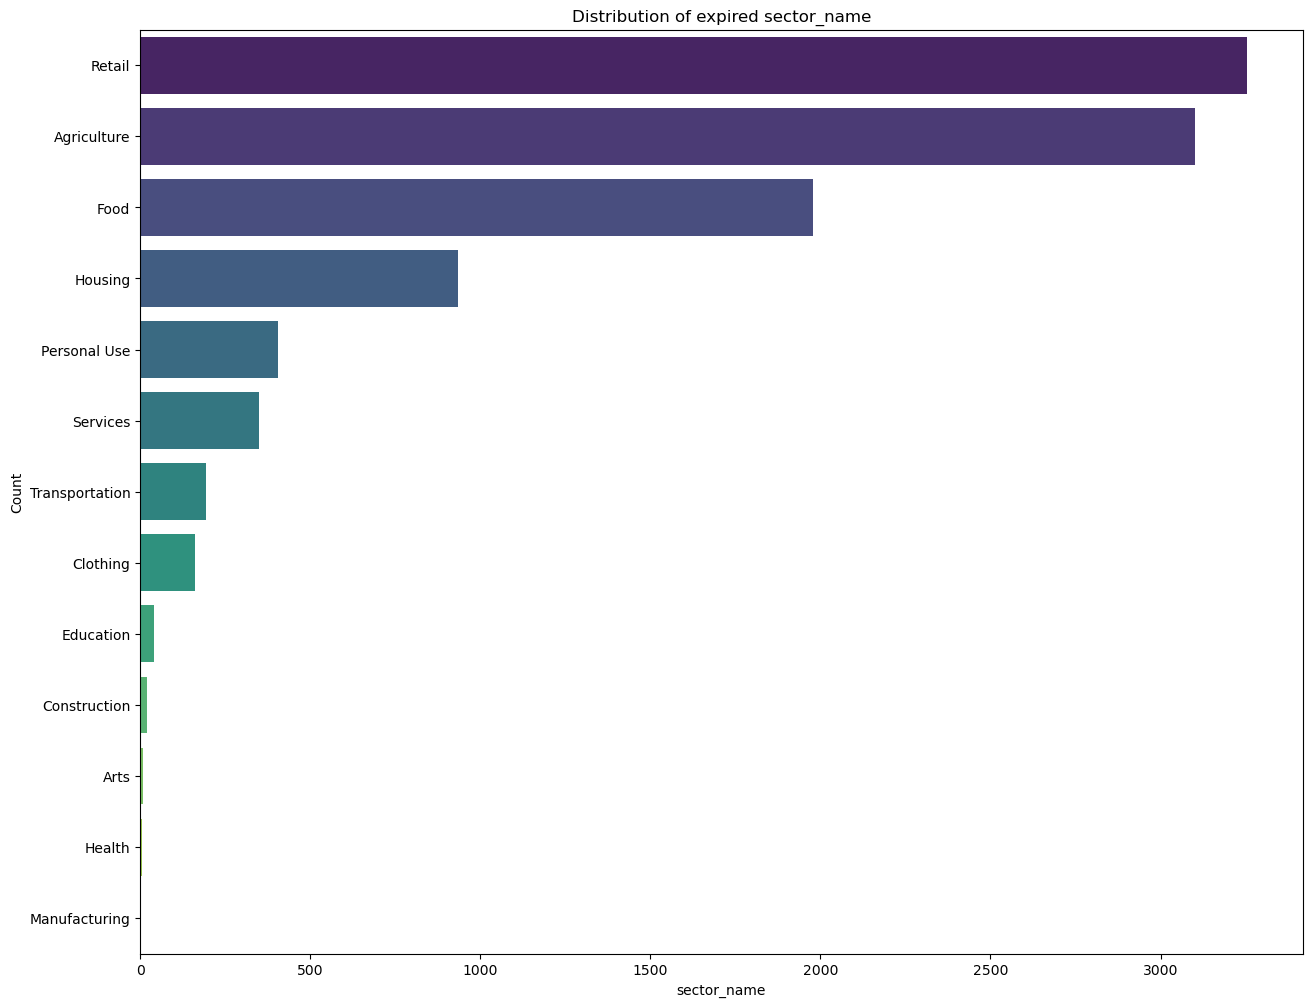

In [42]:
# 5.1 Expired distribution of sector_name
df_sea_1 = df_sea[df_sea['is_expired']==1]
count_sector_name = df_sea_1['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of expired sector_name')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


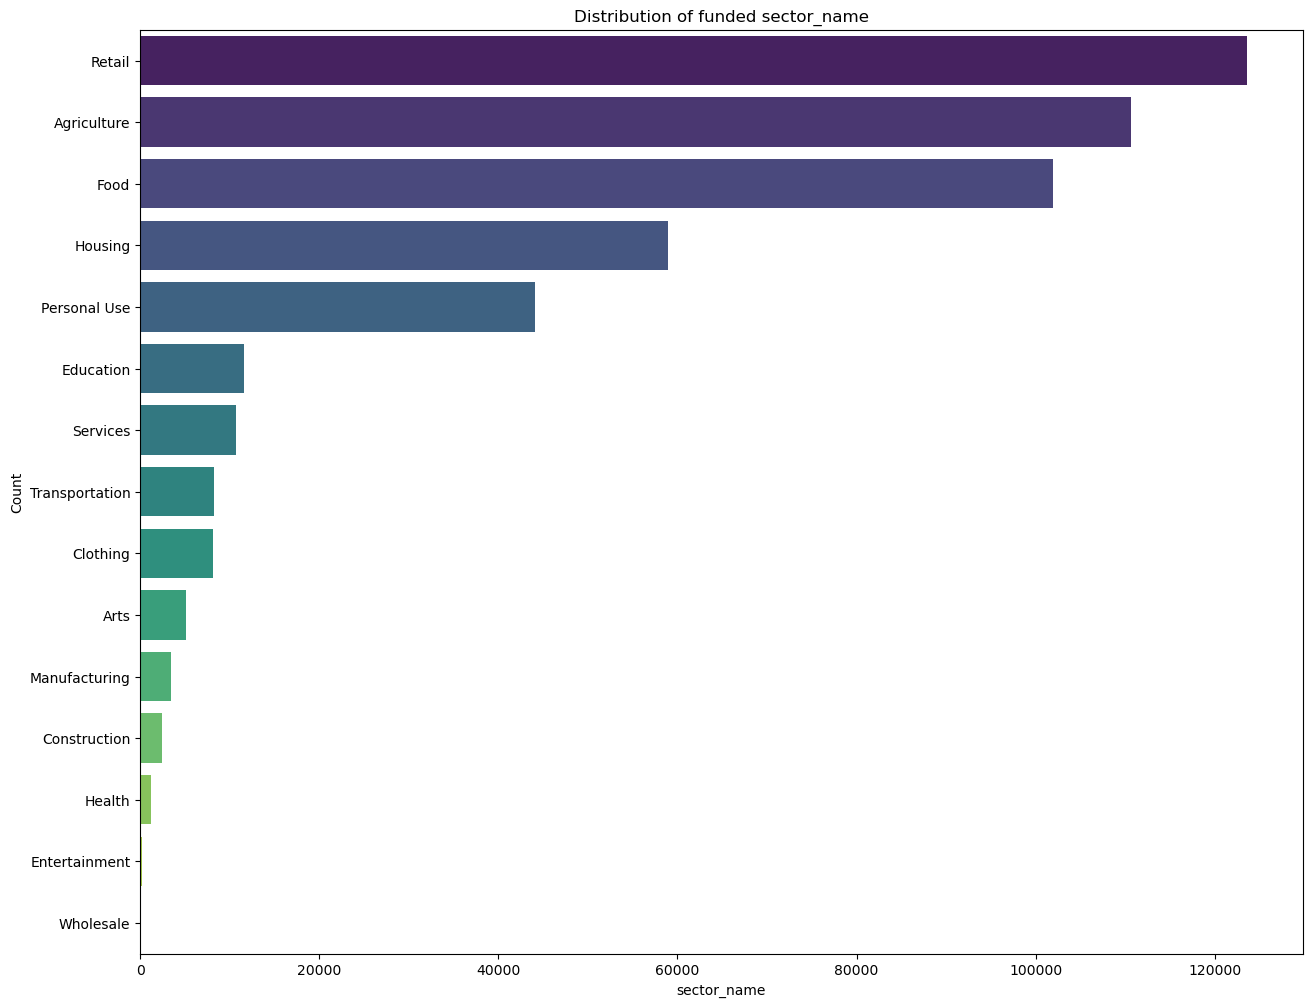

In [43]:
# 5.2 Funded distribution of sector_name
df_sea_0 = df_sea[df_sea['is_expired']==0]
count_sector_name = df_sea_0['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of funded sector_name')
plt.show()

# EDA on All Countries

In [7]:
# 1. Copy df_all_loans_cleaned to df_all and get info
df_all = df_all_loans_cleaned.copy(deep=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546186 entries, 0 to 1546185
Data columns (total 18 columns):
 #   Column                           Non-Null Count    Dtype              
---  ------                           --------------    -----              
 0   loan_id                          1546186 non-null  object             
 1   group_loan                       1546186 non-null  int64              
 2   with_image                       1546186 non-null  int64              
 3   with_video                       1546186 non-null  int64              
 4   posted_time                      1546186 non-null  datetime64[ns, UTC]
 5   is_expired                       1546186 non-null  int64              
 6   loan_amount                      1546186 non-null  float64            
 7   loan_amount_bin                  1546186 non-null  object             
 8   personal_use                     1546186 non-null  int64              
 9   sector_name                      1546186 non-n

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


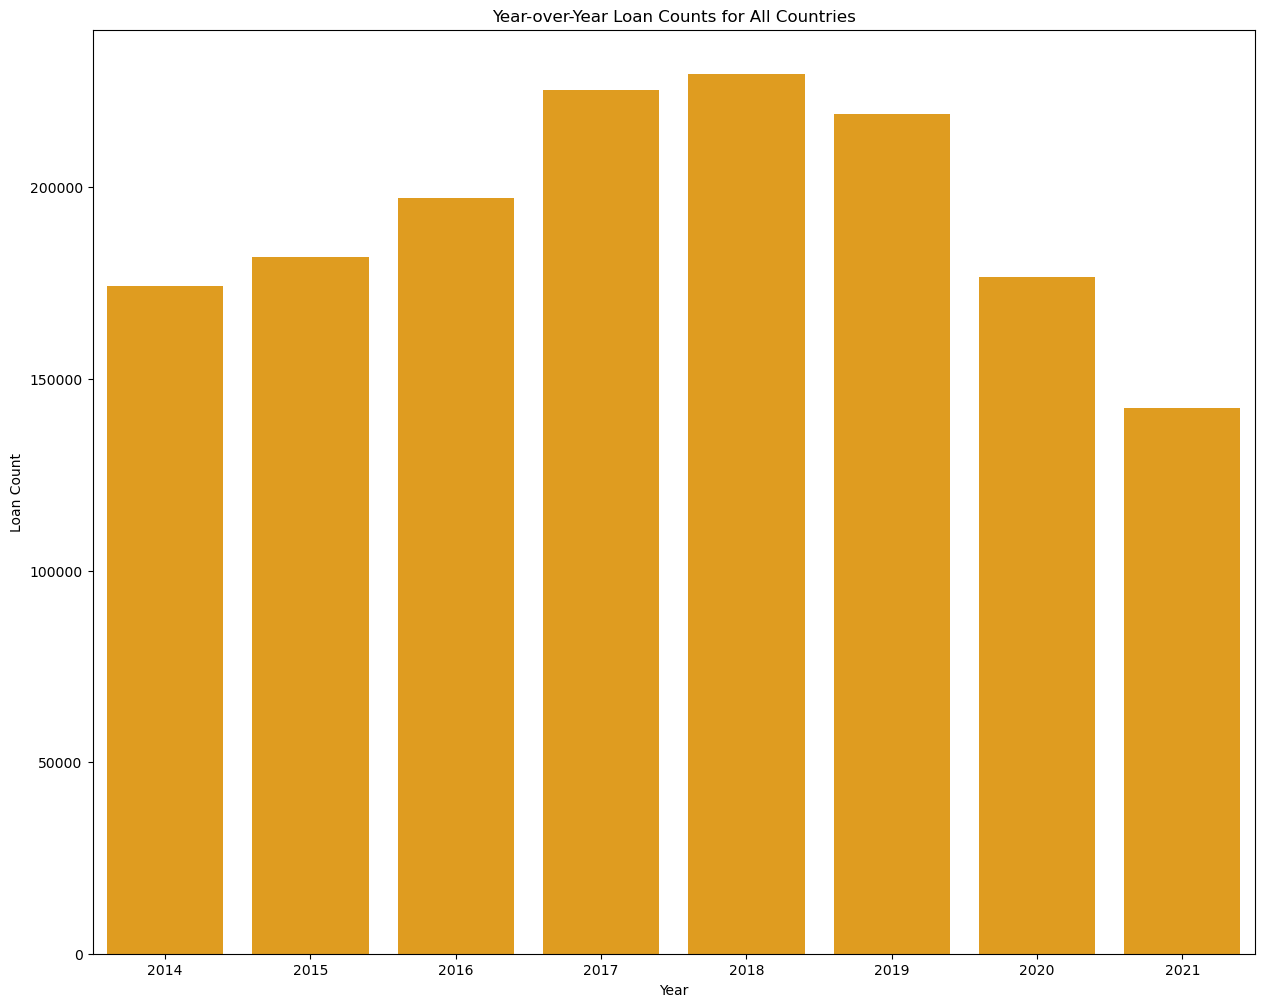

In [8]:
# 2. Year-over-Year All Countries Number of Loans
df_all['posted_year'] = df_all['posted_time'].dt.year
df_all = df_all[['posted_time', 'posted_year'] + [col for col in df_all.columns if col not in ['posted_time', 'posted_year']]]
yoy_all = df_all['posted_year'].value_counts()

plt.figure(figsize=(15, 12))
sns.barplot(x=yoy_all.index, y=yoy_all.values, color='orange')  
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.title('Year-over-Year Loan Counts for All Countries')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


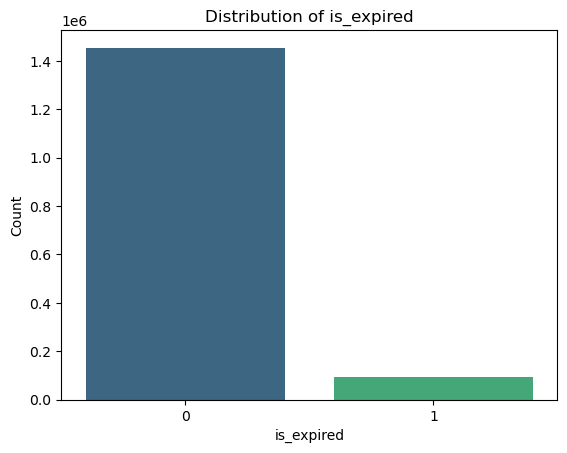

In [14]:
# 3. Check distribution on the target (is_expired)
count_is_expired = df_all['is_expired'].value_counts()
sns.barplot(x=count_is_expired.index, y=count_is_expired.values, palette='viridis')
plt.xlabel('is_expired')
plt.ylabel('Count')
plt.title('Distribution of is_expired')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


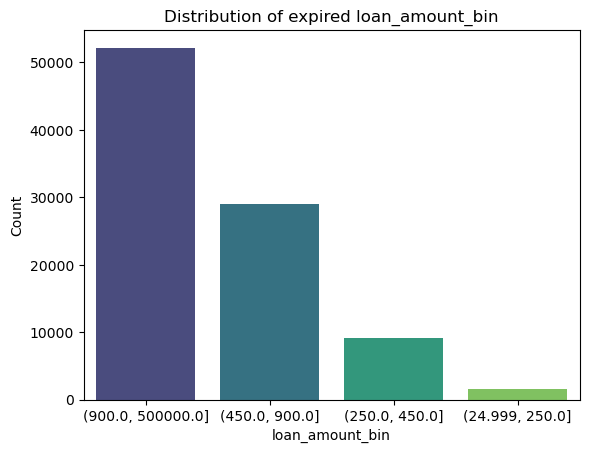

In [28]:
# 4.1 Expired distribution of loan_amount_bin
df_all_1 = df_all[df_all['is_expired']==1]
count_loan_amount_bin = df_all_1['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of expired loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


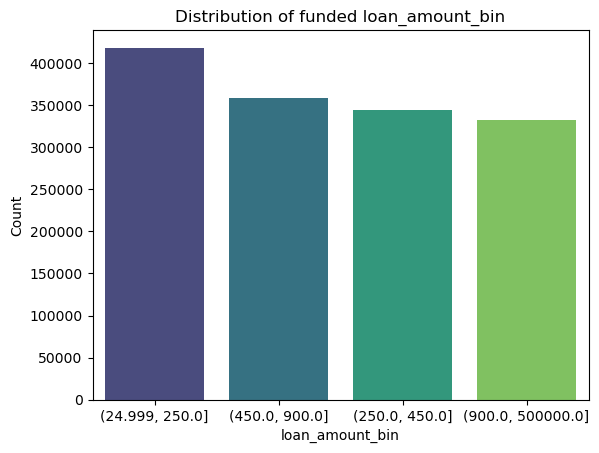

In [29]:
# 4.2 Funded distribution of loan_amount_bin
df_all_0 = df_all[df_all['is_expired']==0]
count_loan_amount_bin = df_all_0['loan_amount_bin'].value_counts()
sns.barplot(x=count_loan_amount_bin.index, y=count_loan_amount_bin.values, palette='viridis')
plt.xlabel('loan_amount_bin')
plt.ylabel('Count')
plt.title('Distribution of funded loan_amount_bin')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


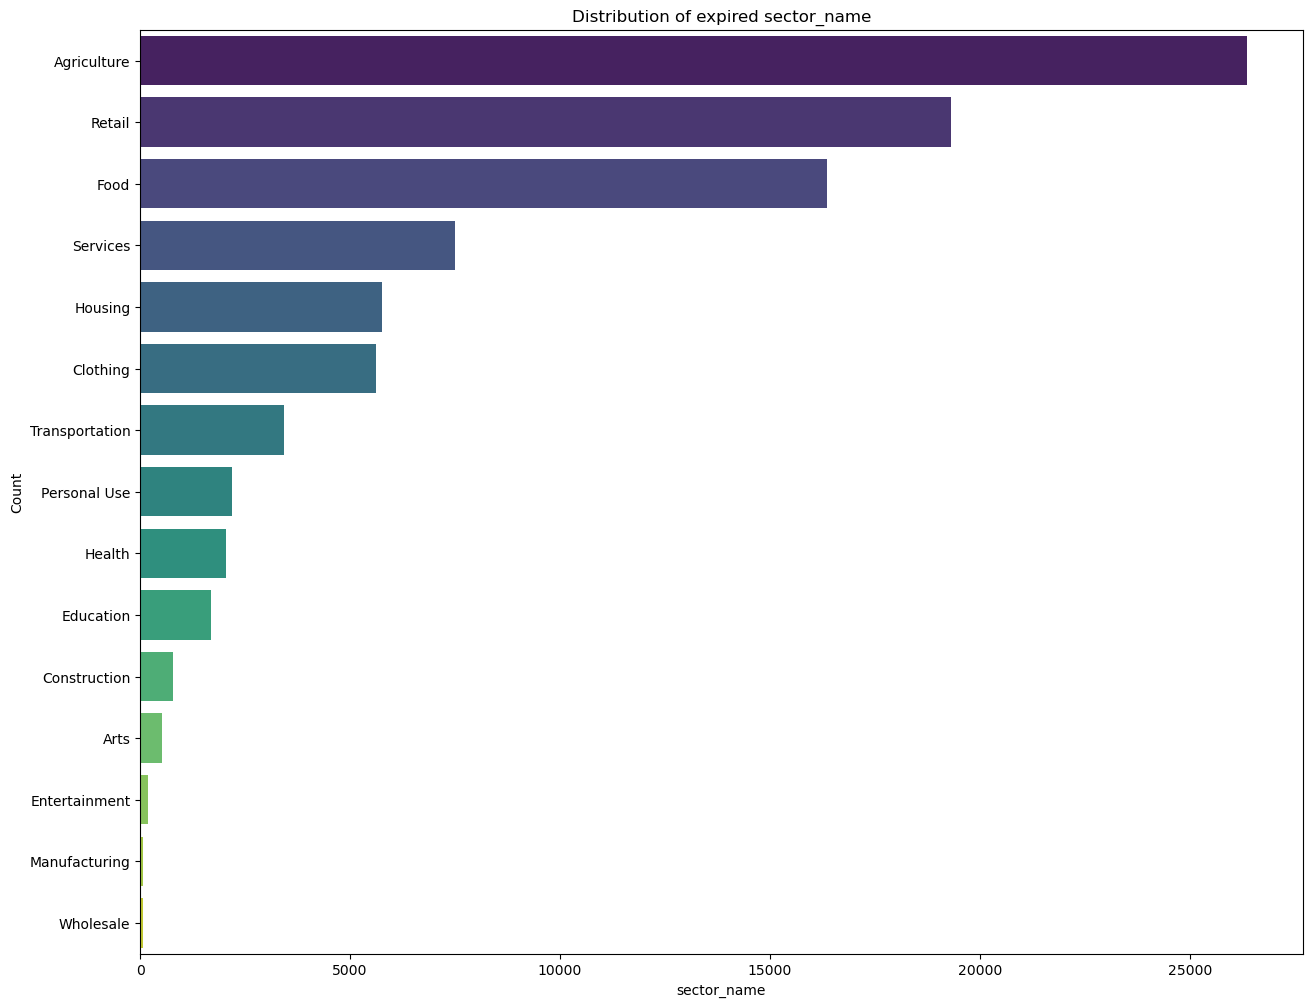

In [44]:
# 5.1 Expired distribution of sector_name
df_all_1 = df_all[df_all['is_expired']==1]
count_sector_name = df_all_1['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of expired sector_name')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


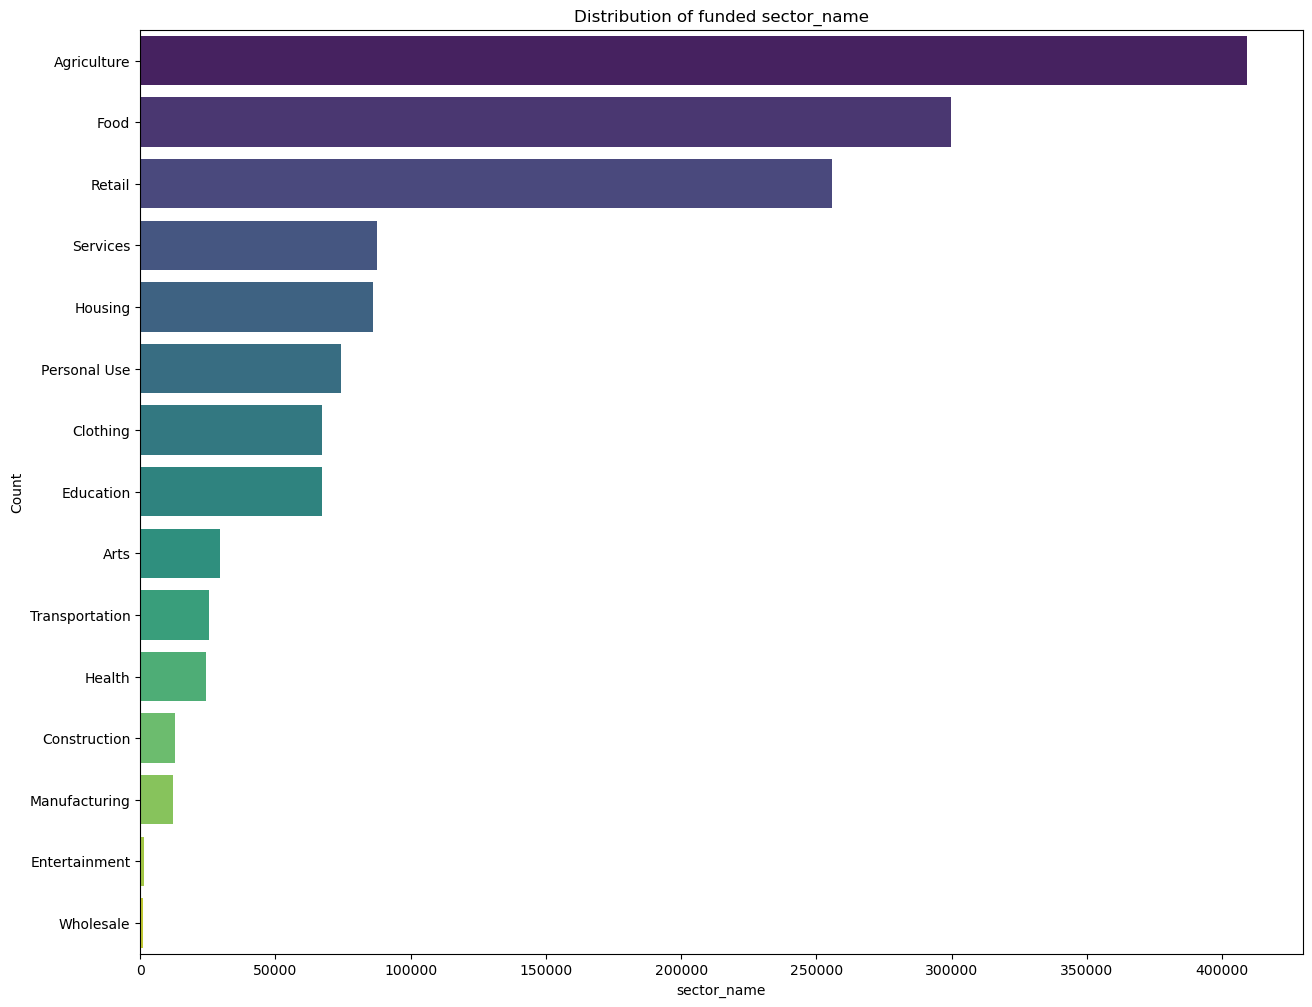

In [45]:
# 5.2 Funded distribution of sector_name
df_all_0 = df_all[df_all['is_expired']==0]
count_sector_name = df_all_0['sector_name'].value_counts()
plt.figure(figsize=(15, 12))
sns.barplot(x=count_sector_name.values, y=count_sector_name.index, palette='viridis')
plt.xlabel('sector_name')
plt.ylabel('Count')
plt.title('Distribution of funded sector_name')
plt.show()